# threshold genes to detect whether they are expressed in cell type of interest
output a table that has all genes in rows and cell types as columns, then gives TRUE/FALSE value for expression of each gene in each cell, then average for cell types and in the end give a percentage of cells in a cell type == TRUE

# import libraries and data

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
import seaborn as sns
import os

In [3]:
os.getcwd()

'/Users/u0118120/FlySleepLab Dropbox/Joana/sleep_signature/10x/analysis/code/description'

In [8]:
os.chdir('/Users/u0118120/FlySleepLab Dropbox/Joana/coding/shiny_py_genedetector/data/')

In [5]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=120)

The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
anndata     0.8.0
scanpy      1.8.0
sinfo       0.3.4
-----
PIL                 9.5.0
appnope             0.1.4
backcall            0.2.0
beta_ufunc          NA
binom_ufunc         NA
cycler              0.10.0
cython_runtime      NA
dateutil            2.9.0
debugpy             1.6.3
decorator           5.1.1
entrypoints         0.4
h5py                3.8.0
ipykernel           6.16.2
jedi                0.19.1
joblib              1.3.2
kiwisolver          1.4.5
llvmlite            0.39.1
matplotlib    

In [9]:
adata = sc.read_h5ad('adata_22032024.h5ad')

In [10]:
adata.obs

,Age,Condition,Genotype,Run,Singlet,Sleep_Stage,Treatment,doublet_scores,n_counts,n_genes,...,all_res8,HRG_sqrt,CRG_sqrt,Cluster_ID_res8_240622,Cluster_ID_res8_070722,Cluster_ID_res8_080822,ring_3clusters,neuron_glia,neuron_glia_pos,combined_annos
index,,,,,,,,,,,,,,,,,,,,,
AAACCCAAGGAGGCAG-fc9729__DGRP_Mix_Sleep_Deprivation_1-20180419,6-9 days,ZT 8 wake,line_88,20180419,True,ZT_8,Wake,0.042720,7702.0,2211,...,nonPAM,10.440307,1.914854,nonPAM,nonPAM,nonPAM,NaN,neuron,neuron,nonPAM
AAACCCAAGGGTCACA-fc9729__DGRP_Mix_Sleep_Deprivation_1-20180419,6-9 days,ZT 20 sleep,line_441,20180419,True,ZT_20,Sleep,0.027581,8043.0,2246,...,201,5.385165,0.000000,201,201,201,NaN,neuron,neuron,201_Cholinergic
AAACCCACAAATACAG-fc9729__DGRP_Mix_Sleep_Deprivation_1-20180419,6-9 days,ZT 8 wake stimulation,line_313,20180419,True,ZT_8,Wake,0.053623,655.0,411,...,ALG-,3.316625,0.000000,133,133,133,NaN,glia,133,133_glia
AAACCCACAAGCACCC-fc9729__DGRP_Mix_Sleep_Deprivation_1-20180419,6-9 days,ZT 20 sleep,line_441,20180419,True,ZT_20,Sleep,0.027581,3774.0,1492,...,90,6.782330,4.281744,90,90,90,NaN,neuron,neuron,90_Cholinergic
AAACCCACAAGTGGAC-fc9729__DGRP_Mix_Sleep_Deprivation_1-20180419,6-9 days,ZT 20 sleep,line_441,20180419,True,ZT_20,Sleep,0.058220,15036.0,3112,...,34,3.162278,4.358899,34,34,34,NaN,neuron,neuron,34_Cholinergic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTTCTGTAAGC-fcae49__S3_10x_240920-20200924,7 days,ZT 8 gab,line_287,20200924,True,ZT_8,Sleep,0.036336,1589.0,797,...,138,0.000000,0.000000,138,138,138,NaN,neuron,neuron,138_Cholinergic
TTTGTTGAGGAACTCG-fcae49__S3_10x_240920-20200924,6-8 days,ZT 8 gab,line_441,20200924,True,ZT_8,Sleep,0.010993,1490.0,809,...,67,0.000000,5.972158,67,67,67,NaN,neuron,neuron,67_Glutamatergic
TTTGTTGCAACCAATC-fcae49__S3_10x_240920-20200924,7 days,ZT 8 wake,line_379,20200924,True,ZT_8,Wake,0.012016,4453.0,1483,...,26,6.928203,6.952218,26,26,26,NaN,neuron,neuron,26_Glutamatergic


In [18]:
# get all genes detected in sc data
all_genes = pd.DataFrame(adata.raw.var.index)
gene_list = all_genes['index'].to_list()
gene_list

['l(2)gl',
 'Ir21a',
 'CR43609',
 'Cda5',
 'CR45339',
 'CR45340',
 'dbr',
 'CR44987',
 'galectin',
 'CG11374',
 'net',
 'Zir',
 'CG11377',
 'Nhe1',
 'Sam-S',
 'CG11455',
 'CG4822',
 'CG3164',
 'CR44969',
 'Gs1',
 'CR44185',
 'CR44186',
 'CG31974',
 'CG11454',
 'CG42399',
 'CG3709',
 'CG3436',
 'CG33635',
 'spen',
 'mRpL10',
 'CG11617',
 'Tbc1d15-17',
 'kis',
 'CR44222',
 'CR44221',
 'CR44218',
 'Rpp30',
 'CG3645',
 'CG17075',
 'CG3345',
 'mbm',
 'CG11555',
 'CG17078',
 'smo',
 'CG11601',
 'CG3625',
 'Amnionless',
 'CG11562',
 'U2af38',
 'Hop',
 'Pi3K21B',
 'Plc21C',
 'CG33127',
 'CG43755',
 'CG31921',
 'Ent1',
 'RpI135',
 'AP-2alpha',
 'ebi',
 'RpLP1',
 'CG11885',
 'ex',
 'crq',
 'CG4164',
 'CG4133',
 'CG4297',
 'MED15',
 'ush',
 'cbt',
 'lwr',
 'Spp',
 'Ets21C',
 'nAChRbeta3',
 'rempA',
 'CG2789',
 'CG11835',
 'CG2794',
 'Nle',
 'CG2807',
 'Ipk2',
 'cold',
 'Ptth',
 'Gsc',
 'CG13689',
 'Eaat2',
 'GABA-B-R3',
 'CG13947',
 'Pkg21D',
 'Dbp21E2',
 'Saf6',
 'Pex12',
 'CG3876',
 'Clp',
 'CG

In [8]:
# read in the list of genes of interest
genes = pd.read_csv('/Users/Joana/sleep_signature/analysis/miri/032224_GPCRs.csv', header=None)
genes['in_data'] = genes[0].isin(all_genes['index'])
gene_list_sub = genes[genes['in_data'] == True]
gene_list = gene_list_sub[0].tolist()
gene_list

['CG13229',
 'CG13995',
 '5-HT1B',
 '5-HT2A',
 '5-HT2B',
 '5-HT7',
 'Dop1R1',
 'Dop1R2',
 'DopEcR',
 'Dop2R',
 'Nmdar1',
 'Nmdar2',
 'GluRIB',
 'GluRIIA',
 'GluRIIE',
 'mGluR',
 'mtt',
 'GluClalpha',
 'nAChRalpha1',
 'nAChRalpha2',
 'nAChRalpha3',
 'nAChRalpha6',
 'nAChRalpha7',
 'nAChRbeta1',
 'nAChRbeta2',
 'nAChRbeta3',
 'mAChR-A',
 'mAChR-B',
 'GABA-B-R1',
 'GABA-B-R2',
 'Lcch3',
 'Grd',
 'CG12344',
 'Oamb',
 'Octbeta2R',
 'Octbeta3R',
 'TyrRII',
 'ort',
 'AstA-R1',
 'AstA-R2',
 'Pdfr',
 'SPR',
 'hec',
 'CG33639',
 'CG32547',
 'CCKLR-17D1',
 'CCKLR-17D3',
 'CG13995',
 'rk',
 'CCHa2-R',
 'CG13229',
 'Dh44-R2',
 'Dh31-R',
 'CCHa1-R',
 'CrzR',
 'AstC-R2',
 'AstC-R1',
 'CapaR',
 'NPFR',
 'TkR86C',
 'PK2-R2',
 'PK1-R',
 'Lgr1',
 'SIFaR',
 'Lgr3',
 'CCAP-R',
 'RYa-R',
 'CG43795',
 'VGlut',
 'ple']

# how can i describe the distribution of gene expression per gene across all 106762 cells?
number of 0 expression values of a given gene, see histograms under data exploration part at the end of notebook, look for better methods to describe 0-inflated distributions

In [12]:
# for each gene calculate  how many cells have a count of 0
sparse_mask = adata.raw.X.toarray() == 0
# Sum along the rows to count the number of 0s for each gene
gene_sparsity = np.sum(sparse_mask, axis=0)

In [13]:
gene_sparsity

array([104845, 106661, 104033, ...,    203, 105745,  26815])

In [14]:
# count the number of cells in which alrm is not expressed (== 0) and take this as an example gene that is sparsely expressed to make this the threshold used in the histogram
percentile_thresholds = np.where(gene_sparsity < gene_sparsity[all_genes['index'] == 'alrm'], 75, 95)

#or np.count_nonzero(adata.raw[:,['alrm']].X.toarray() == 0)

In [15]:
percentile_thresholds

array([95, 95, 95, ..., 75, 95, 75])

In [19]:
# make a df indicating whether a gene is expressed in each cell, yes (1) or no (0) based on the threshold above

# Create an empty dictionary to store gene thresholds
gene_thresh_dict = {}
# empty DataFrame to store normalized gene expression values
gene_exp_norm_df = pd.DataFrame(index=adata.obs.index)
# empty DataFrame to store the binary values
binary_df = pd.DataFrame(index=adata.obs.index)

for gene_name in gene_list:
    gene_index = adata.raw.var_names.get_loc(gene_name)
    sparsity_value = gene_sparsity[gene_index]
    percentile_threshold = percentile_thresholds[gene_index]
    
    # Get the gene expression values for the specific gene
    gene_exp = pd.DataFrame(adata.raw[:, [gene_name]].X.toarray(), columns=[gene_name], index=adata.obs.index)
    
    # Normalize the gene expression values
    gene_exp_norm = gene_exp / gene_exp.max()
    
    # Calculate and store the gene threshold
    gene_thresh = np.percentile(gene_exp_norm, percentile_threshold)
    gene_thresh_dict[gene_name] = gene_thresh
    
    # Store the normalized gene expression values in the DataFrame
    gene_exp_norm_df[gene_name] = gene_exp_norm.values.flatten()
    
    # Create binary column for the gene
    binary_df[gene_name] = (gene_exp_norm_df[gene_name] > gene_thresh).astype(int)

binary_df

/Users/u0118120/miniforge3/envs/shiny_app/lib/python3.7/site-packages/ipykernel_launcher.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/Users/u0118120/miniforge3/envs/shiny_app/lib/python3.7/site-packages/ipykernel_launcher.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


,l(2)gl,Ir21a,CR43609,Cda5,CR45339,CR45340,dbr,CR44987,galectin,CG11374,...,mt:tRNA:S:AGY,mt:ND5,mt:ND4,mt:ND4L,mt:ND6,mt:Cyt-b,mt:ND1,mt:lrRNA,mt:tRNA:V,mt:srRNA
index,,,,,,,,,,,,,,,,,,,,,
AAACCCAAGGAGGCAG-fc9729__DGRP_Mix_Sleep_Deprivation_1-20180419,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACCCAAGGGTCACA-fc9729__DGRP_Mix_Sleep_Deprivation_1-20180419,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACCCACAAATACAG-fc9729__DGRP_Mix_Sleep_Deprivation_1-20180419,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
AAACCCACAAGCACCC-fc9729__DGRP_Mix_Sleep_Deprivation_1-20180419,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACCCACAAGTGGAC-fc9729__DGRP_Mix_Sleep_Deprivation_1-20180419,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTTCTGTAAGC-fcae49__S3_10x_240920-20200924,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,1
TTTGTTGAGGAACTCG-fcae49__S3_10x_240920-20200924,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
TTTGTTGCAACCAATC-fcae49__S3_10x_240920-20200924,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
gene_exp_norm_df

,l(2)gl,Ir21a,CR43609,Cda5,CR45339,CR45340,dbr,CR44987,galectin,CG11374,...,mt:tRNA:S:AGY,mt:ND5,mt:ND4,mt:ND4L,mt:ND6,mt:Cyt-b,mt:ND1,mt:lrRNA,mt:tRNA:V,mt:srRNA
index,,,,,,,,,,,,,,,,,,,,,
AAACCCAAGGAGGCAG-fc9729__DGRP_Mix_Sleep_Deprivation_1-20180419,0.0,0.0,0.0,0.000000,0.0,0.0,0.238430,0.000000,0.000000,0.0,...,0.0,0.244123,0.646052,0.0,0.000000,0.783836,0.000000,0.334616,0.0,0.000000
AAACCCAAGGGTCACA-fc9729__DGRP_Mix_Sleep_Deprivation_1-20180419,0.0,0.0,0.0,0.231109,0.0,0.0,0.000000,0.000000,0.225739,0.0,...,0.0,0.340868,0.418231,0.0,0.000000,0.577037,0.324494,0.515488,0.0,0.000000
AAACCCACAAATACAG-fc9729__DGRP_Mix_Sleep_Deprivation_1-20180419,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.531939,0.635149,0.0,0.000000,0.647784,0.720666,0.593777,0.0,0.000000
AAACCCACAAGCACCC-fc9729__DGRP_Mix_Sleep_Deprivation_1-20180419,0.0,0.0,0.0,0.000000,0.0,0.0,0.370925,0.000000,0.000000,0.0,...,0.0,0.351007,0.451073,0.0,0.355783,0.688567,0.270353,0.478270,0.0,0.280222
AAACCCACAAGTGGAC-fc9729__DGRP_Mix_Sleep_Deprivation_1-20180419,0.0,0.0,0.0,0.000000,0.0,0.0,0.242364,0.000000,0.236349,0.0,...,0.0,0.388071,0.480858,0.0,0.212067,0.644688,0.512567,0.438006,0.0,0.110359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTTCTGTAAGC-fcae49__S3_10x_240920-20200924,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.792970,0.365686,0.0,0.853780,0.847241,0.414922,0.593912,0.0,0.564726
TTTGTTGAGGAACTCG-fcae49__S3_10x_240920-20200924,0.0,0.0,0.0,0.763392,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.508989,0.561497,0.0,0.394880,0.769977,0.776844,0.650567,0.0,0.660355
TTTGTTGCAACCAATC-fcae49__S3_10x_240920-20200924,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.411322,0.000000,0.0,...,0.0,0.537173,0.491830,0.0,0.395521,0.686817,0.245853,0.611976,0.0,0.254827


# Creating new annotation column, i.e. getting a more informative cell_type column * kind of unrelated to the gene detector
- now that i have the binary_df I want to calculate the percentage of cells belonging to the same cell type that express a gene
- for that I first make a new column with better annotations
- the column Cluster_ID_res8_080822 mostly consists of non-annotated clusters (defined by cluster number in res 8).
- While I don't know their cell type, at least we can use the classification into one of the three major neurotransmitters. 
- If the cell can still not get classified by neurotransmitter, at least we can define whether it's a neuron or glia.

In [16]:
# first create a new column that indicates whether a cell is neuron or glia

glia_clusters = [
    adata.obs['louvain_res2.0'].isin(['76']),
    adata.obs['louvain_res8.0'].isin(['19', '133', '64']),
    adata.obs['louvain_res4.0'].isin(['81', '77', '28']),
    adata.obs['louvain_res2.0'].isin(['18'])
]

adata.obs['neuron_glia'] = 'neuron'
adata.obs.loc[pd.concat(glia_clusters, axis=1).any(axis=1), 'neuron_glia'] = 'glia'

# only need those three columns for getting at the improved annotation column
annos = adata.obs[['Neurotransmitter', 'Cluster_ID_res8_080822', 'neuron_glia']]

In [17]:
# the neurotransmitter column has the values Glut, VACht, GABA or Unknown. 
# Although I don't know the NT, at least I know whether it's neuron or glia from the column I just created, so I'll change all Unknowns
def update_neurotransmitter(row):
    if row['Neurotransmitter'] == 'Unknown':
        if row['neuron_glia'] == 'neuron':
            return 'neuron'
        else:
            return 'glia'
    else:
        return row['Neurotransmitter']

# Apply the function to update the Neurotransmitter column
annos['Neurotransmitter'] = annos.apply(update_neurotransmitter, axis=1)


/home/vibflysleep/anaconda3/envs/scanpy17/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [18]:
# refining the annotations in adata.obs['Cluster_ID_res8_080822'] by combining it with two other columns and creating the new column 'combined_annos' 

def merge_values(row):
    if row['Cluster_ID_res8_080822'].isdigit():  
        if row['neuron_glia'] == 'neuron' or row['Neurotransmitter'] == 'Unknown':
            return f"{row['Cluster_ID_res8_080822']}_{row['neuron_glia']}"
        else:
            return f"{row['Cluster_ID_res8_080822']}_{row['Neurotransmitter']}"
    else:
        return row['Cluster_ID_res8_080822']

# Apply the function to create the new column 'combined_annos'
annos['combined_annos'] = annos.apply(merge_values, axis=1)

# Group by 'Cluster_ID_res8_080822' and 'Neurotransmitter', and count occurrences
grouped_counts = annos[annos['Cluster_ID_res8_080822'].str.isdigit()]\
                    .groupby(['Cluster_ID_res8_080822', 'Neurotransmitter']).size().reset_index(name='count')

# For each group, get the Neurotransmitter value with the highest count
max_counts = grouped_counts.groupby('Cluster_ID_res8_080822').apply(lambda x: x.loc[x['count'].idxmax()])

# Update the 'combined_annos' column with the Neurotransmitter values that most cells have
for cluster_id, neurotransmitter in max_counts[['Cluster_ID_res8_080822', 'Neurotransmitter']].values:
    if cluster_id.isdigit():
        annos.loc[annos['Cluster_ID_res8_080822'] == cluster_id, 'combined_annos'] = f"{cluster_id}_{neurotransmitter}"
    else:
        annos.loc[annos['Cluster_ID_res8_080822'] == cluster_id, 'combined_annos'] = cluster_id

annos

/home/vibflysleep/anaconda3/envs/scanpy17/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/home/vibflysleep/anaconda3/envs/scanpy17/lib/python3.7/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Neurotransmitter,Cluster_ID_res8_080822,neuron_glia,combined_annos
index,,,,
AAACCCAAGGAGGCAG-fc9729__DGRP_Mix_Sleep_Deprivation_1-20180419,neuron,nonPAM,neuron,nonPAM
AAACCCAAGGGTCACA-fc9729__DGRP_Mix_Sleep_Deprivation_1-20180419,Cholinergic,201,neuron,201_Cholinergic
AAACCCACAAATACAG-fc9729__DGRP_Mix_Sleep_Deprivation_1-20180419,glia,133,glia,133_glia
AAACCCACAAGCACCC-fc9729__DGRP_Mix_Sleep_Deprivation_1-20180419,Cholinergic,90,neuron,90_Cholinergic
AAACCCACAAGTGGAC-fc9729__DGRP_Mix_Sleep_Deprivation_1-20180419,Cholinergic,34,neuron,34_Cholinergic
...,...,...,...,...
TTTGGTTTCTGTAAGC-fcae49__S3_10x_240920-20200924,Cholinergic,138,neuron,138_Cholinergic
TTTGTTGAGGAACTCG-fcae49__S3_10x_240920-20200924,Glutamatergic,67,neuron,67_Glutamatergic
TTTGTTGCAACCAATC-fcae49__S3_10x_240920-20200924,neuron,26,neuron,26_Glutamatergic


In [22]:
# get a fraction per gene of its expression across the cells in a cell type

#add the combined_annos column to the binary_df to average over all cells
binary_df['cell_type'] = adata.obs['combined_annos']

cell_type_counts = binary_df['cell_type'].value_counts().reset_index()
cell_type_counts.columns = ['cell_type', 'cell_count']

# average over all cells of a cell type
avg_ct = binary_df.groupby('cell_type').mean().reset_index()

final = pd.merge(cell_type_counts, avg_ct, on='cell_type')
final

/Users/u0118120/miniforge3/envs/shiny_app/lib/python3.7/site-packages/ipykernel_launcher.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  after removing the cwd from sys.path.


,cell_type,cell_count,l(2)gl,Ir21a,CR43609,Cda5,CR45339,CR45340,dbr,CR44987,...,mt:tRNA:S:AGY,mt:ND5,mt:ND4,mt:ND4L,mt:ND6,mt:Cyt-b,mt:ND1,mt:lrRNA,mt:tRNA:V,mt:srRNA
0,y,4344,0.008517,0.000460,0.014273,0.041436,0.000921,0.001381,0.040285,0.032919,...,0.027164,0.140654,0.156077,0.053407,0.151243,0.164134,0.160221,0.204880,0.005525,0.247928
1,ab,4166,0.005281,0.000480,0.019683,0.133941,0.002400,0.000960,0.082333,0.037926,...,0.019443,0.140663,0.146423,0.047288,0.158665,0.159386,0.140663,0.221315,0.005761,0.277244
2,0_Cholinergic,2257,0.033230,0.001329,0.015507,0.053168,0.001772,0.001772,0.046079,0.036331,...,0.040762,0.236154,0.256535,0.061586,0.271156,0.260080,0.237040,0.339832,0.014178,0.327869
3,1_Cholinergic,1902,0.007361,0.000000,0.014196,0.089380,0.001052,0.000526,0.083596,0.018402,...,0.039958,0.828076,0.811251,0.102524,0.754995,0.911146,0.628286,0.756046,0.009464,0.567823
4,4_glia,1759,0.021035,0.000000,0.000000,0.002843,0.000000,0.000000,0.013644,0.002274,...,0.004548,0.415009,0.471859,0.027857,0.436612,0.690733,0.280273,0.289937,0.001137,0.317794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,25_Cholinergic,6,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.166667,0.000000,...,0.000000,0.500000,0.333333,0.000000,0.500000,0.833333,0.500000,0.500000,0.000000,0.833333
210,3_Cholinergic,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.500000,0.500000,0.000000,0.000000,1.000000,0.500000,0.500000,0.000000,0.500000
211,2_neuron,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
212,15_Cholinergic,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


In [23]:
final.to_csv('/Users/u0118120/FlySleepLab Dropbox/Joana/sleep_signature/10x/analysis/code/description/genedetector_all.csv', index=False)

In [37]:
cell_type_counts

,cell_type,cell_count
0,y,4344
1,ab,4166
2,0_Cholinergic,2257
3,1_Cholinergic,1902
4,4_glia,1759
...,...,...
209,25_Cholinergic,6
210,3_Cholinergic,2
211,2_neuron,1
212,15_Cholinergic,1


In [39]:
# write to .csv
final.to_csv('/Users/Joana/sleep_signature/analysis/miri/032224_gene_detector.csv', index=False)

# data explorer

0.25200068205595

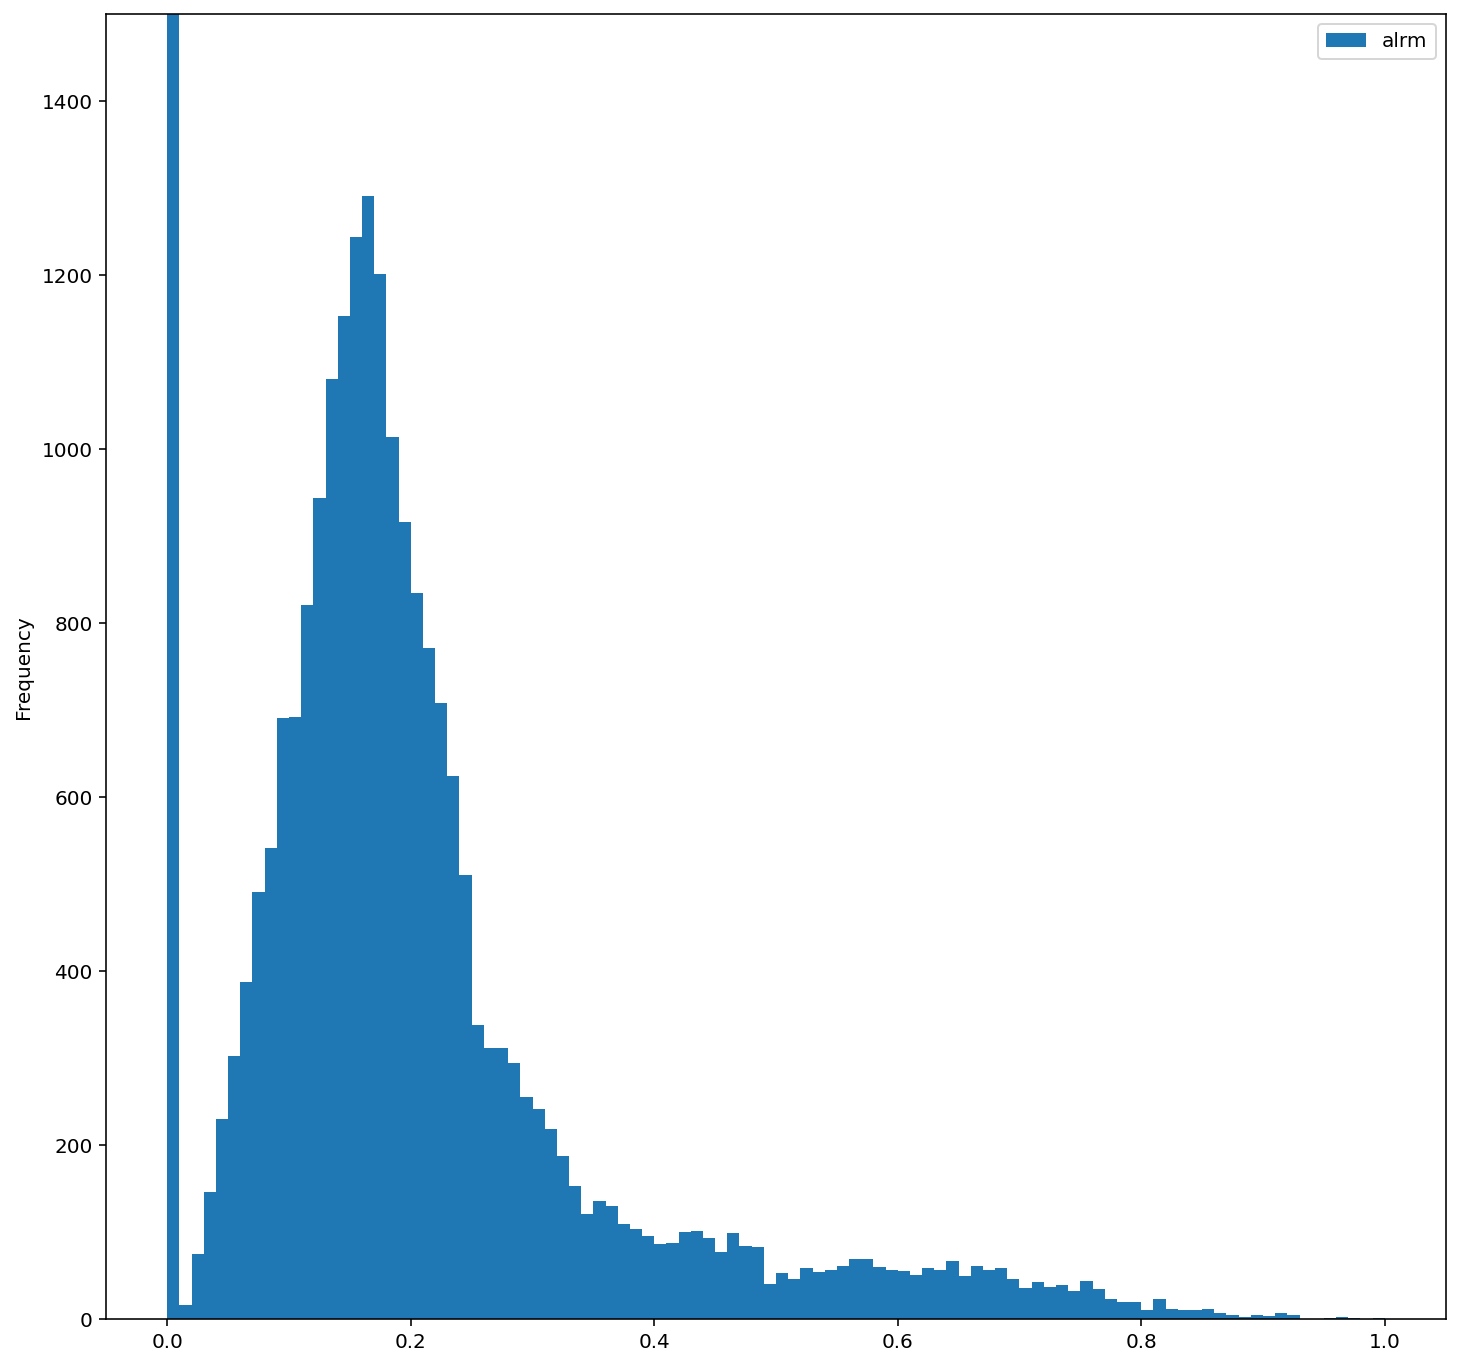

In [126]:
# make histogram of sparse glia gene
alrm = pd.DataFrame(adata.raw[:,['alrm']].X.toarray(), columns=['alrm'], index=adata.obs.index)

alrm_norm = alrm / alrm.max()

alrm_norm.plot(kind='hist', bins=100, figsize=(12,12), stacked=True)
plt.ylim(0, 1500)

# good threshold for alrm would be above 95th percentile
np.percentile(alrm_norm, 95)

0.7068151235580444

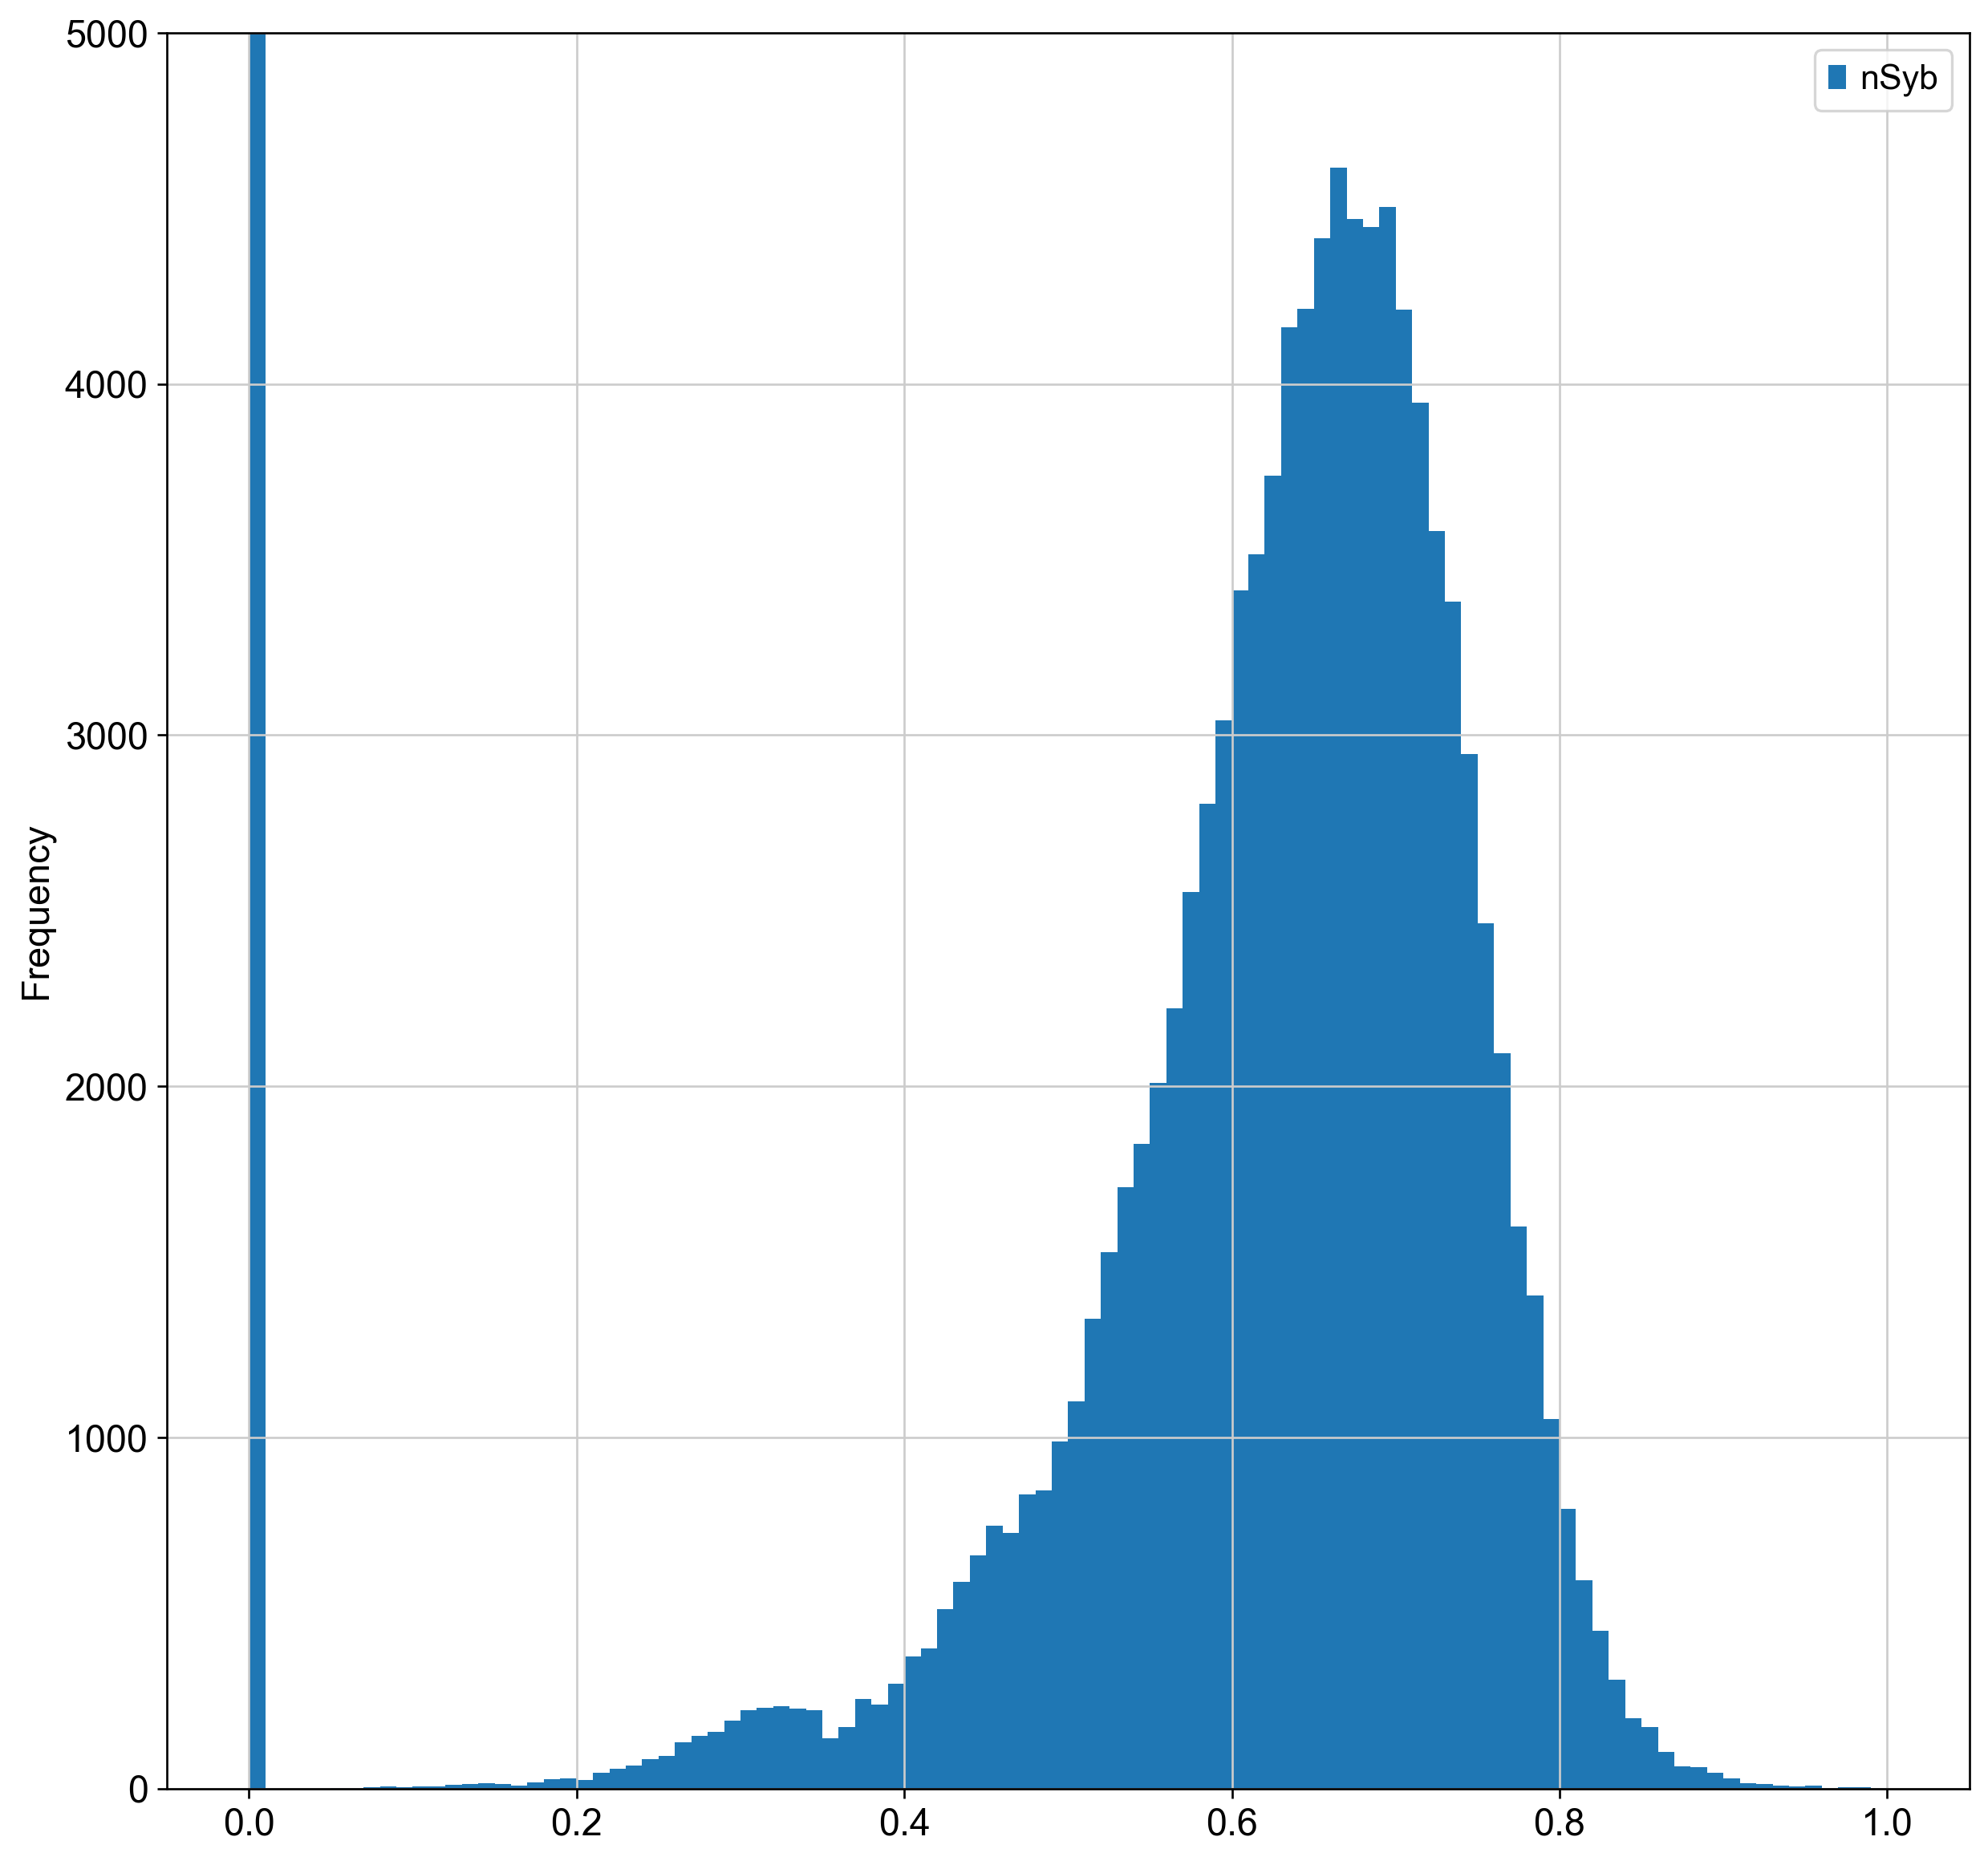

In [51]:
# make histogram of ubiquotous neuronal gene
nSyb = pd.DataFrame(adata.raw[:,['nSyb']].X.toarray(), columns=['nSyb'], index=adata.obs.index)

nSyb_norm = nSyb / nSyb.max()

nSyb_norm.plot(kind='hist', bins=100, figsize=(12,12), stacked=True)
plt.ylim(0, 5000)

# good threshold for nSyb would be above 75th percentile
np.percentile(nSyb_norm, 75)

0.1306504450738428

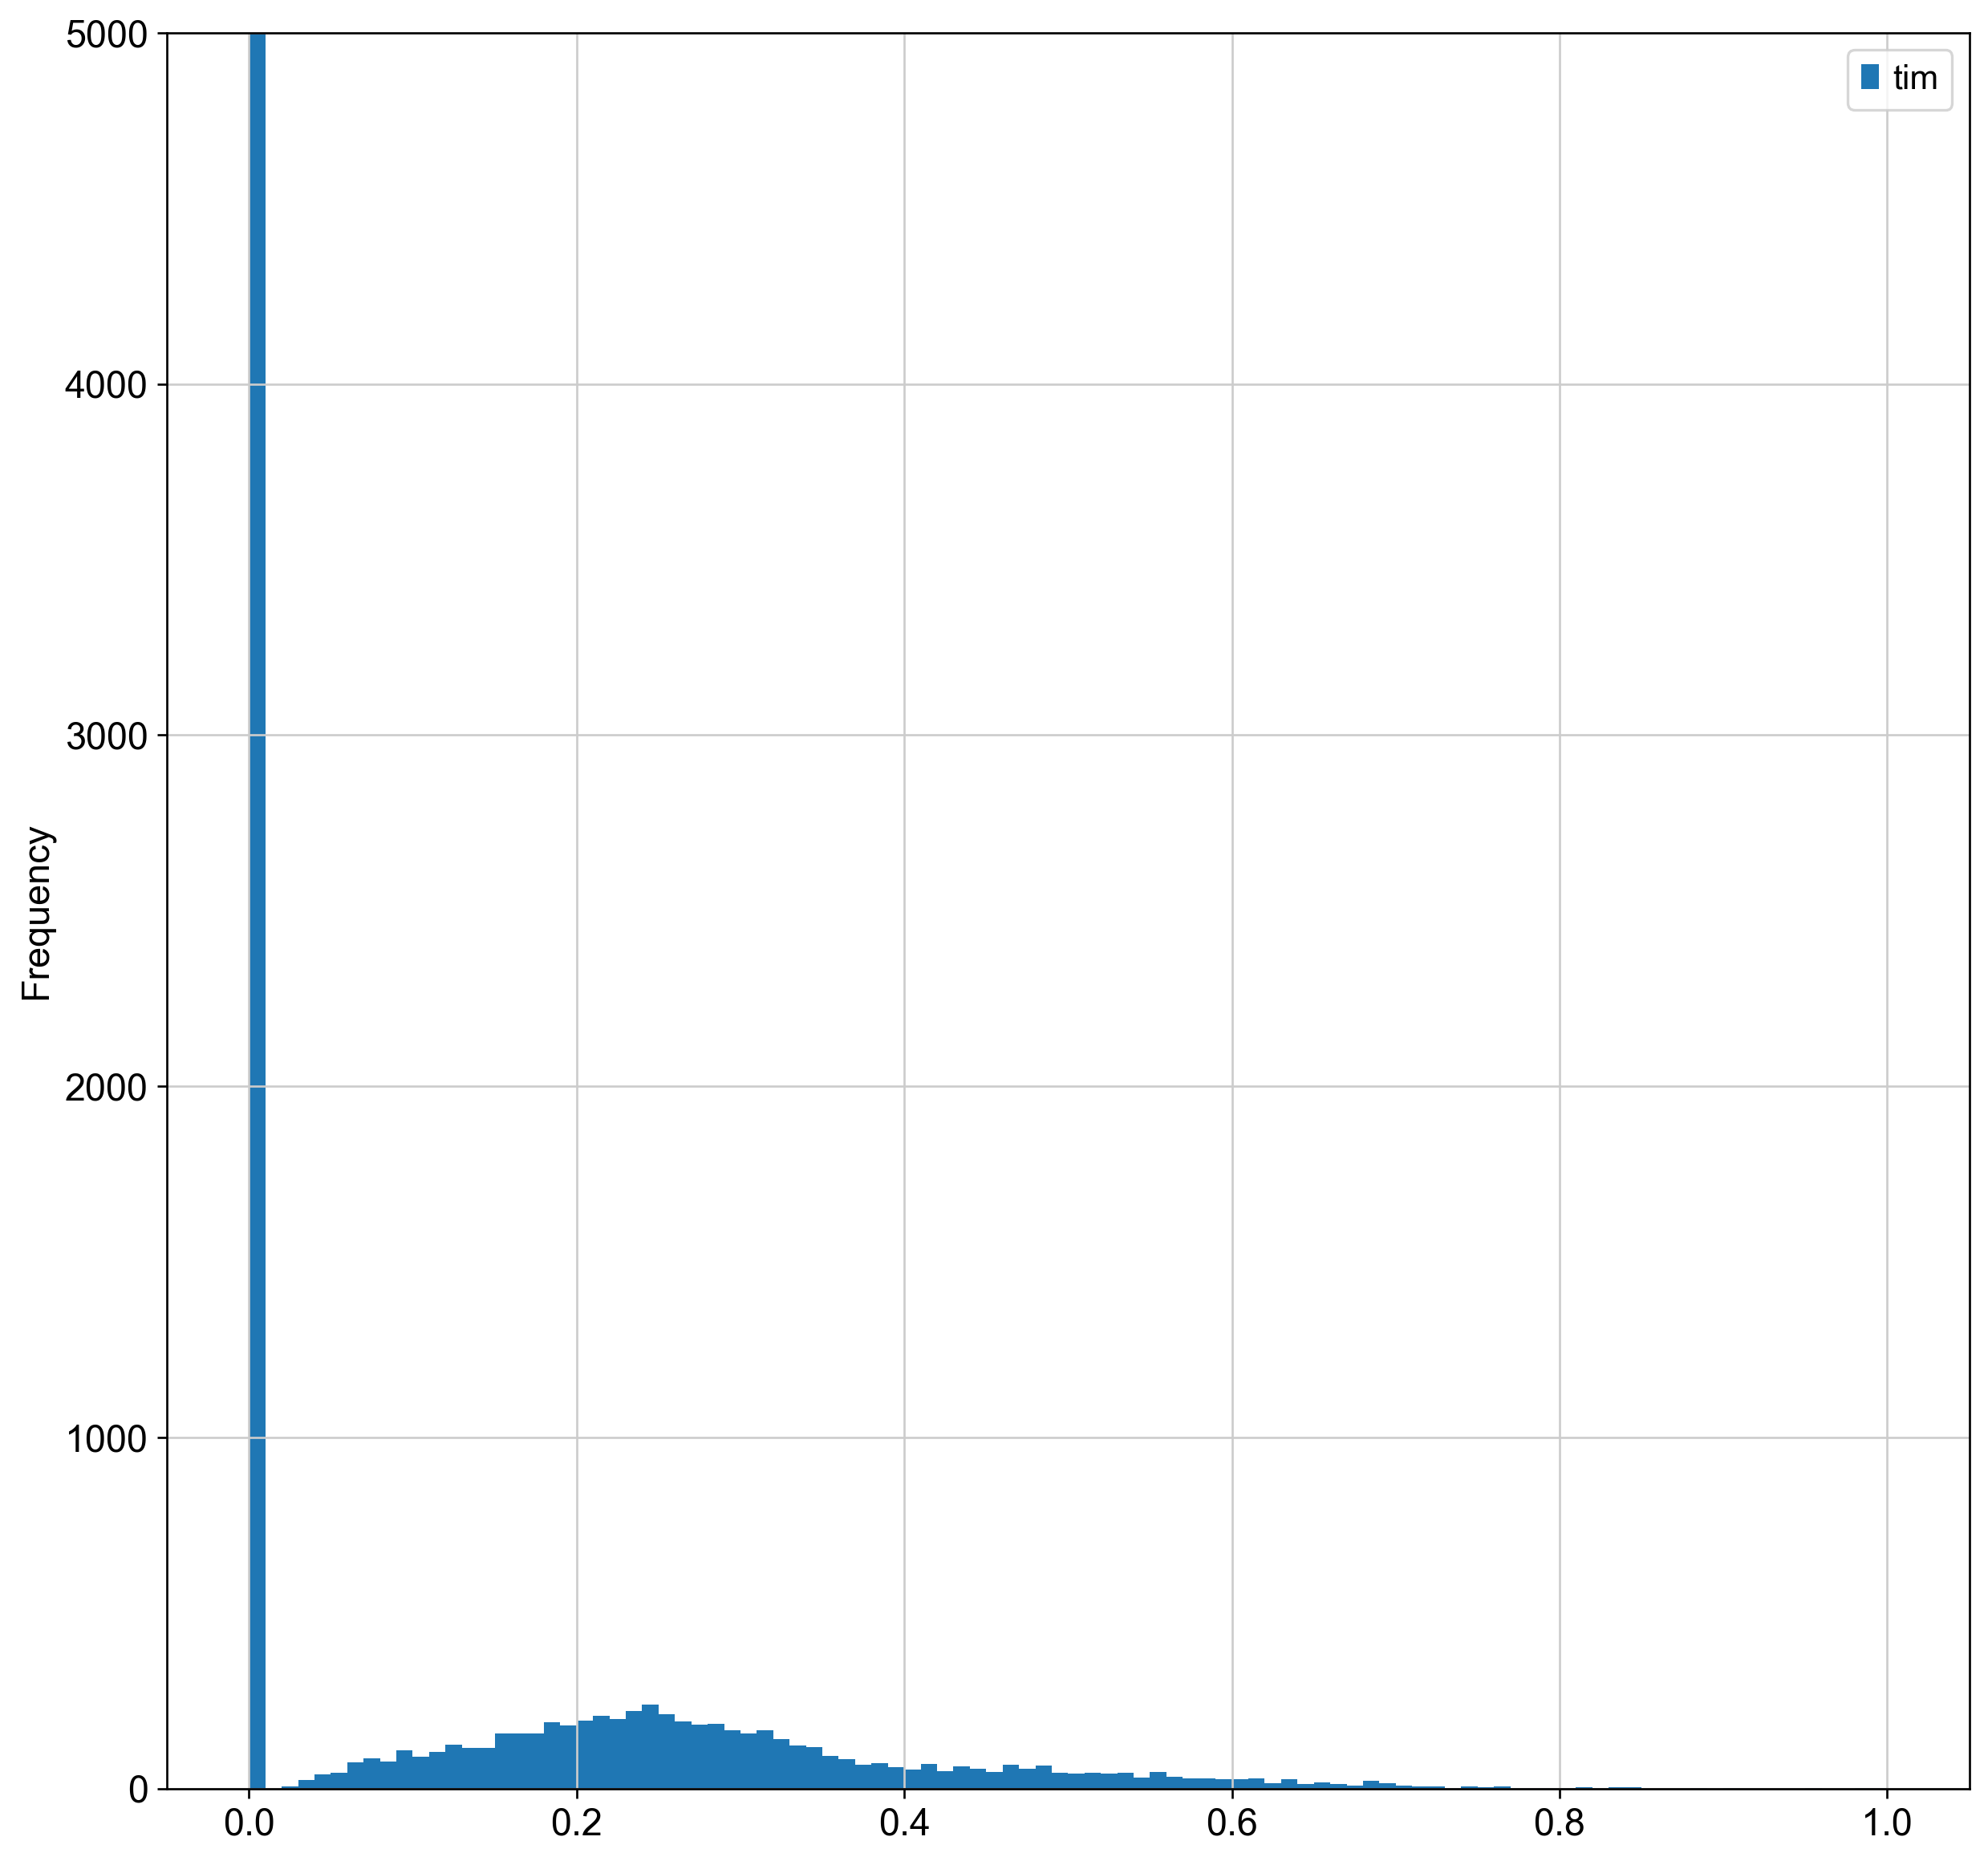

In [60]:
tim = pd.DataFrame(adata.raw[:,['tim']].X.toarray(), columns=['tim'], index=adata.obs.index)

tim_norm = tim / tim.max()

tim_norm.plot(kind='hist', bins=100, figsize=(12,12), stacked=True)
plt.ylim(0, 5000)

# good threshold for nSyb would be above 75th percentile
np.percentile(tim_norm, 95)

In [27]:
num_zeros = np.count_nonzero(adata.raw[:,['alrm']].X.toarray() == 0)
num_zeros

84676

In [100]:
adata.raw[:,['alrm']].X

<106762x1 sparse matrix of type '<class 'numpy.float32'>'
	with 22086 stored elements in Compressed Sparse Row format>

In [ ]:
sparsity_value = gene_sparsity[all_genes['index'] == 'nSyb']

In [42]:
# look up sparsity value (i.e. how many cells have count of 0 for that gene) and corresponding genes
for value in np.unique(gene_sparsity):
    indices = np.where(gene_sparsity == value)[0]
    genes = [gene[i] for i in indices]
    print(f"For sparsity value {value}, genes are: {genes}")


For sparsity value 2, genes are: ['CR41602']
For sparsity value 4, genes are: ['noe']
For sparsity value 9, genes are: ['mt:CoI']
For sparsity value 11, genes are: ['mt:CoII']
For sparsity value 18, genes are: ['mt:CoIII']
For sparsity value 41, genes are: ['mt:ATPase6']
For sparsity value 42, genes are: ['mt:Cyt-b']
For sparsity value 203, genes are: ['mt:lrRNA']
For sparsity value 524, genes are: ['Atpalpha']
For sparsity value 1185, genes are: ['CG9821']
For sparsity value 1217, genes are: ['Cam']
For sparsity value 1303, genes are: ['CR31451']
For sparsity value 1470, genes are: ['roX1']
For sparsity value 1803, genes are: ['IA-2']
For sparsity value 1865, genes are: ['Hsromega']
For sparsity value 1893, genes are: ['14-3-3zeta']
For sparsity value 1955, genes are: ['CR41609']
For sparsity value 2008, genes are: ['ps']
For sparsity value 2082, genes are: ['CR34335']
For sparsity value 2096, genes are: ['CR40677']
For sparsity value 2202, genes are: ['nrv3']
For sparsity value 2205,